# Exploring the Gaussian Mixture Model

#Theory

![image.png](attachment:image.png)

![image.png](attachment:image.png)


https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

## Description of the problem

During a certain survey, researchers have collected data about Height and Weight of a sample of males and females of a particular population.

Unfortunately, due to some mishandling in the data, the "label" with the information about the gender of each individual sampled has been lost.

Using alternative methods, try to reconstruct specific linear regressions between Height and Weight separated by gender.

You are provided with two data files:
* ```heights_and_weights - not labelled.csv``` (for analysis)
* ```heights_and_weights - test.csv``` (for validation and test)

## load dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from plotnine import *
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
df_not_labeled = pd.read_csv('/content/heights_and_weights - not labelled.csv')

In [ ]:
df_not_labeled.head()

,Height,Weight
0,149.470102,65.703306
1,192.640524,89.367363
2,161.249836,58.029358
3,162.859226,88.223729
4,169.855082,55.709751


In [ ]:
# Create the Gaussian Mixture model with 2 components
gm = GaussianMixture(n_components=2, covariance_type='full')

# Fit the model on the data
gm.fit(df_not_labeled)

# Get the predicted clusters for each sample
labels = gm.predict(df_not_labeled)

# Separate the clusters based on mean values
cluster0_indices = np.where(labels == 0)[0]
cluster1_indices = np.where(labels == 1)[0]

cluster0_mean_height = np.mean(df_not_labeled.iloc[cluster0_indices]['Height'])
cluster0_mean_weight = np.mean(df_not_labeled.iloc[cluster0_indices]['Weight'])
cluster1_mean_height = np.mean(df_not_labeled.iloc[cluster1_indices]['Height'])
cluster1_mean_weight = np.mean(df_not_labeled.iloc[cluster1_indices]['Weight'])

if cluster0_mean_height > cluster1_mean_height and cluster0_mean_weight > cluster1_mean_weight:
    male_cluster_indices = cluster0_indices
    female_cluster_indices = cluster1_indices
else:
    male_cluster_indices = cluster1_indices
    female_cluster_indices = cluster0_indices
    
# Get the mean and covariance for each cluster
cluster0_mean = df_not_labeled.iloc[female_cluster_indices].mean()
cluster0_covariance = df_not_labeled.iloc[female_cluster_indices].cov()

cluster1_mean = df_not_labeled.iloc[male_cluster_indices].mean()
cluster1_covariance = df_not_labeled.iloc[male_cluster_indices].cov()

# Print the mean and covariance for each cluster
print("Cluster 0 Females:")
print("Mean of Height:", cluster0_mean['Height'])
print("Mean of Weight:", cluster0_mean['Weight'])
print("Covariance Matrix:\n", cluster0_covariance)

print("\nCluster 1 Males:")
print("Mean of Height:", cluster1_mean['Height'])
print("Mean of Weight:", cluster1_mean['Weight'])
print("Covariance Matrix:\n", cluster1_covariance)

Cluster 0 Females:
Mean of Height: 164.86353036217227
Mean of Weight: 57.87772858434457
Covariance Matrix:
            Height     Weight
Height  31.755584   5.802093
Weight   5.802093  54.358159

Cluster 1 Males:
Mean of Height: 175.80191763927039
Mean of Weight: 79.57294715566525
Covariance Matrix:
            Height     Weight
Height  92.014203  26.763683
Weight  26.763683  45.991713


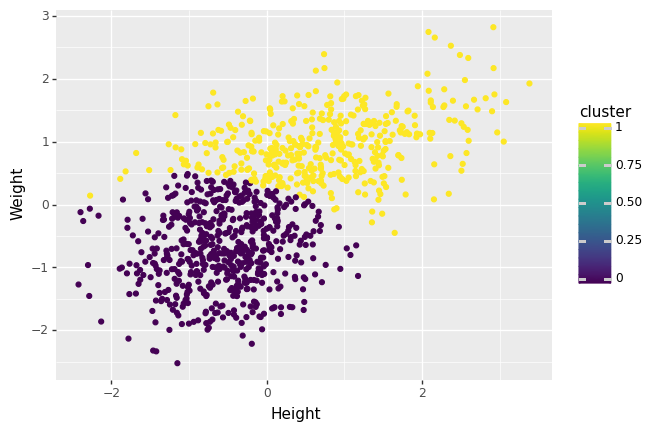

<ggplot: (8790663967172)>

In [ ]:
# graph
features = ["Height", "Weight"]

X = df_not_labeled[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=2, covariance_type='full')

EM.fit(X)

cluster = EM.predict(X)

X["cluster"] = cluster

(ggplot(X, aes(x = "Height", y = "Weight", color = "cluster" )) + geom_point())

As we see in the graph, the purple points are predicted to be females. On the other hand, males are predicted to be yellow points

Now, for each instance in our dataset we could construct a predictor for its classification (as MALE or FEMALE) based on their **joint** probabilities based on the previous distributions.

In [ ]:
def Prediction(h,w):
    pm = norm.pdf_not_labeled(h, mu_h_m, sd_h_m)*norm.pdf_not_labeled(w, mu_w_m, sd_w_m)
    pf = norm.pdf_not_labeled(h, mu_h_f, sd_h_f)*norm.pdf_not_labeled(w, mu_w_f, sd_w_f)
    if pf > pm:
        print("0") # female
    else:
        print("1")# male  

In [ ]:
from scipy.stats import multivariate_normal

# Compute the multivariate normal distributions for each cluster
mvn0 = multivariate_normal(mean=cluster0_mean, cov=cluster0_covariance)
mvn1 = multivariate_normal(mean=cluster1_mean, cov=cluster1_covariance)

def predict_gender(height, weight):
    # Compute the joint probabilities for each cluster
    prob0 = mvn0.pdf([height, weight])
    prob1 = mvn1.pdf([height, weight])
    
    if prob0 > prob1:
        return 0 # female
    else:
        return 1 # male


In [ ]:
# male prediction
predict_gender(180, 90)


1

In [ ]:
# female prediction
predict_gender(150, 50)

0

Now, using the test dataset provided ```heights_and_weights - test.csv``` try to get and idea of the level of accuracy obtained (use ```accuracy_score``` and ```confusion_matrix```)

In [ ]:
test_df = pd.read_csv('/content/heights_and_weights - test.csv')
test_df.head()

,Height,Weight,Gender
0,182.610377,76.146090,1.0
1,161.959102,56.715853,0.0
2,190.327792,90.353570,1.0
3,179.656624,76.340152,1.0
4,164.292474,68.754672,1.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_preds = test_df.apply(lambda x: predict_gender(x['Height'], x['Weight']), axis=1)
test_labels = test_df['Gender']

# Compute the accuracy score
accuracy = accuracy_score(test_labels, test_preds)
print('Accuracy:', accuracy)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.91
Confusion Matrix:
 [[94  6]
 [12 88]]


Now, using that ad-hoc classifier construct the regresion lines ```sklearn.linear_model.LinearRegression``` for each category (MALE,FEMALE) and for the population as a whole

Report your results```regr.coef_,regr.intercept_``` and plot them (eventually also "scatter" plot with the original data to better visualizing the results)

In [ ]:
from sklearn.linear_model import LinearRegression
male_df = test_df[test_df['Gender'] == 1.0]
female_df = test_df[test_df['Gender'] == 0.0]

# Fit a linear regression model to the male data
male_regr = LinearRegression()
male_regr.fit(male_df[['Height']], male_df['Weight'])
print('Male Regression Coefficients:', male_regr.coef_)
print('Male Regression Intercept:', male_regr.intercept_)

# Fit a linear regression model to the female data
female_regr = LinearRegression()
female_regr.fit(female_df[['Height']], female_df['Weight'])
print('Female Regression Coefficients:', female_regr.coef_)
print('Female Regression Intercept:', female_regr.intercept_)

# Fit a linear regression model to the entire dataset
total_regr = LinearRegression()
total_regr.fit(test_df[['Height']], test_df['Weight'])
print('Total Regression Coefficients:', total_regr.coef_)
print('Total Regression Intercept:', total_regr.intercept_)

Male Regression Coefficients: [0.5302889]
Male Regression Intercept: -13.524486514064037
Female Regression Coefficients: [0.51477058]
Female Regression Intercept: -28.702960994503606
Total Regression Coefficients: [1.02779538]
Total Regression Intercept: -107.02769856036063


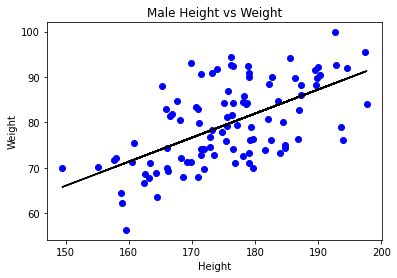

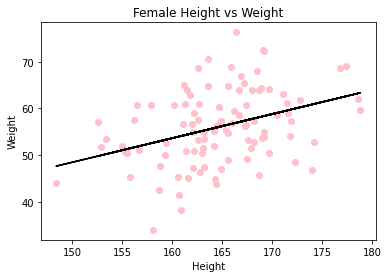

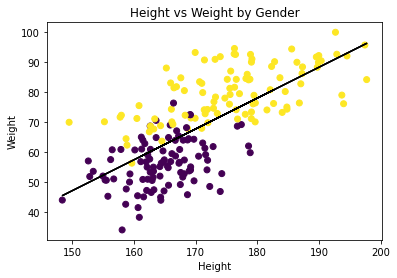

In [ ]:
import matplotlib.pyplot as plt

# Plot male data and regression line
plt.scatter(male_df['Height'], male_df['Weight'], color='blue')
plt.plot(male_df['Height'], male_regr.predict(male_df[['Height']]), color='black')
plt.title('Male Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Plot female data and regression line
plt.scatter(female_df['Height'], female_df['Weight'], color='pink')
plt.plot(female_df['Height'], female_regr.predict(female_df[['Height']]), color='black')
plt.title('Female Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Plot total population data and regression line
plt.scatter(test_df['Height'], test_df['Weight'], c=test_df['Gender'], cmap='viridis')
plt.plot(test_df['Height'], total_regr.predict(test_df[['Height']]), color='black')
plt.title('Height vs Weight by Gender')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

We can clearly see on the graphs that there is a positive corrolation between weight and height. We can also see how males have a higher corrolation than females between male and height

Save findings as a JSON file with the following structure

In [ ]:
answers = {}
answers['FEMALES']={'HEIGHT': {'mu_h_f': mu_h_f, 'sd_h_f': sd_h_f}, 
                    'WEIGHT': {'mu_w_f': mu_w_f, 'sd_w_f': sd_w_f},
                    'CORR'  : {'a_f'   : a_f, 'b_f': b_f}
                   }
answers['MALES']  ={'HEIGHT': {'mu_h_m': mu_h_m, 'sd_h_m': sd_h_m}, 
                    'WEIGHT': {'mu_w_m': mu_w_m, 'sd_w_m': sd_w_m},
                    'CORR'  : {'a_m'   : a_m, 'b_m': b_m}
                   }

import json
with open("MLF_12_01_answers.json", 'w') as fp:
    json.dump(answers, fp, indent=4)

In [ ]:
import json

# create a dictionary to store the results
results = {}

# add the mean height and weight for females
results['female_mean_height'] = cluster0_mean['Height']
results['female_mean_weight'] = cluster0_mean['Weight']

# add the mean height and weight for males
results['male_mean_height'] = cluster1_mean['Height']
results['male_mean_weight'] = cluster1_mean['Weight']

# add the covariance matrix for females
results['female_covariance_matrix'] = cluster0_covariance.values.tolist()

# add the covariance matrix for males
results['male_covariance_matrix'] = cluster1_covariance.values.tolist()

# add the correlation between height and weight for females
results['female_correlation_height_weight'] = female_regr.coef_

# add the correlation between height and weight for males
results['male_correlation_height_weight'] = male_regr.coef_

# Convert numpy arrays to regular lists
for key, value in results.items():
    if isinstance(value, np.ndarray):
        results[key] = value.tolist()

# save the results to a JSON file
with open("MLF_12_01_answers.json", 'w') as f:
    json.dump(results, f)